# **KNN (K Nearest Neighbourhood)**

* The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning method that makes predictions based on how close a data point is to others. It’s widely used for both classification and regression tasks because of its simplicity and popularity. 
* K-Nearest Neighbors (KNN) is an instance-based learning method. It operates for classification as well as regression:
    - **Classification**: For a new data point, the algorithm identifies its nearest neighbors based on a distance metric (e.g., Euclidean distance). The predicted class is determined by the majority class among these neighbors.
    - **Regression**: The algorithm predicts the value for a new data point by averaging the values of its nearest neighbors.

* It is a non-parametric and lazy learning algorithm:

    - **Non-parametric**: Does not assume any specific data distribution.
    - **Lazy learning**: It does not train a model but stores the dataset and makes predictions based on new data.

### What is ‘K’ in K Nearest Neighbour ?
* k is just a number that tells the algorithm how many nearby points (neighbours) to look at when it makes a decision.
    - A **smaller k** value makes the model sensitive to noise, leading to overfitting (complex models).
    - A **larger k** value results in smoother boundaries, reducing model complexity but possibly underfitting.

        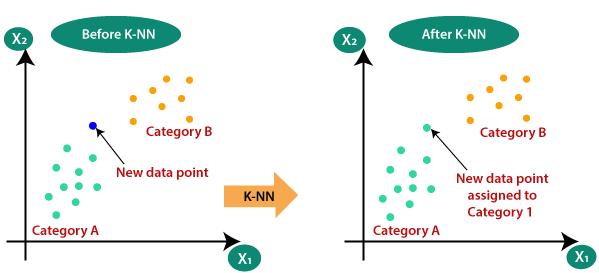


### Distance Metrics Used in KNN Algorithm:
1. Euclidean Distance:
    Euclidean distance is defined as the straight-line distance between two points in a plane or space. You can think of it like the shortest path you would walk if you were to go directly from one point to another.

    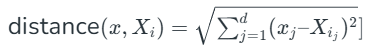

2. Manhattan Distance:
    This is the total distance you would travel if you could only move along horizontal and vertical lines (like a grid or city streets). It’s also called “taxicab distance” because a taxi can only drive along the grid-like streets of a city.

    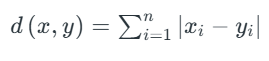

3. Minkowski Distance:
    Minkowski distance is like a family of distances, which includes both Euclidean and Manhattan distances as special cases.
    
    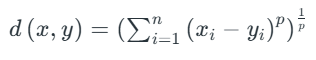

### Working of KNN Algorithm:
![working of KNN Algorithm](knn.gif)


### Implementation of kNN on MNIST:
1. Load the MNIST dataset 
2. Preprocess the data (Flatten images, scale features)
3. Train-Test Split
4. Train kNN model
5. Evaluate Performance
6. Visualize Predictions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load the MNIST Dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser="pandas")
X, y = mnist.data, mnist.target.astype(int)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Train KNN Model

In [3]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [4]:
y_pred = knn.predict(X_test)

### Evaluate Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9701
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       683
           1       0.95      0.99      0.97       800
           2       0.97      0.96      0.97       674
           3       0.96      0.97      0.97       760
           4       0.98      0.97      0.97       611
           5       0.97      0.96      0.97       658
           6       0.98      0.99      0.98       677
           7       0.96      0.96      0.96       724
           8       0.99      0.93      0.96       693
           9       0.96      0.96      0.96       720

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000

Confusion Matrix:
 [[681   0   1   0   0   0   0   0   1   0]
 [  0 796   1   0   1   1   0   0   0   1]
 [  3  10 649   0   1   1   1   6   3   0]
 [  0   1   7 739   0   4   0   2   3   4]
 [  2   2

### Visualization Sample Prediction

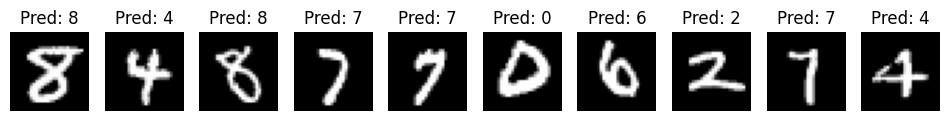

In [6]:
fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {y_pred[i]}')
    ax.axis('off')
plt.show()